<a href="https://colab.research.google.com/github/rupamanogna28/customer-churn-prediction/blob/main/Churn_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Installation of required libraries
!pip install catboost # install catboost package

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier # now it should import correctly
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [44]:
# Reading the dataset
df = pd.read_csv("/content/Churn_Modelling.csv", index_col=0)
df.columns = map(str.lower, df.columns)

In [45]:
# The first 5 observation units of the data set were accessed.
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
# The size of the data set was examined. It consists of 10000 observation units and 13 variables.
df.shape

(10000, 13)

In [47]:
# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       10000 non-null  int64  
 1   surname          10000 non-null  object 
 2   creditscore      10000 non-null  int64  
 3   geography        10000 non-null  object 
 4   gender           10000 non-null  object 
 5   age              10000 non-null  int64  
 6   tenure           10000 non-null  int64  
 7   balance          10000 non-null  float64
 8   numofproducts    10000 non-null  int64  
 9   hascrcard        10000 non-null  int64  
 10  isactivemember   10000 non-null  int64  
 11  estimatedsalary  10000 non-null  float64
 12  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [48]:
# Descriptive statistics of the data set accessed.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
creditscore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
numofproducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
hascrcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
isactivemember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimatedsalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [49]:
# Calculate the mean of numeric columns only
numerical_features = df.select_dtypes(include=['number']).columns
df.groupby("exited")[numerical_features].agg("mean")

,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
exited,,,,,,,,,,
0,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
1,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0


In [50]:
# The average of the age variable according to the gender variable was examined.
df.groupby("gender").agg({"age": "mean"})

,age
gender,
Female,39.238389
Male,38.658237


In [51]:
# The average of the dependent variable according to the gender variable was examined.
df.groupby("gender").agg({"exited": "mean"})

,exited
gender,
Female,0.250715
Male,0.164559


In [52]:
# The average of the dependent variable according to the geography variable was examined.
df.groupby("geography").agg({"exited": "mean"})

,exited
geography,
France,0.161548
Germany,0.324432
Spain,0.166734


In [53]:
# The frequency of the dependent variable has been reached.
df["exited"].value_counts()

,count
exited,
0,7963
1,2037


In [54]:
# Access to those who left us through the dependent variable. (exited == 1)
churn = df[df["exited"] == 1]

In [55]:
# The first 5 observation units were reached.
churn.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [56]:
# Size information has been accessed.
churn.shape

(2037, 13)

In [57]:
# Who left most than the gender variable?
churn.groupby("gender").agg({"exited": "count"})

,exited
gender,
Female,1139
Male,898


In [58]:
# Which country has left us the most?
churn.groupby("geography").agg({"exited": "count"})

,exited
geography,
France,810
Germany,814
Spain,413


In [59]:
# Access to those who do not leave us on the dependent variable. (exited == 0)
non_churn = df[df["exited"] == 0]

In [60]:
# The first 5 observation units were reached.
non_churn.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
RowNumber,,,,,,,,,,,,,
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [61]:
# Size information has been accessed.
non_churn.shape

(7963, 13)

In [62]:
# Which country does not leave the most?
non_churn.groupby("geography").agg({"exited": "count"})

,exited
geography,
France,4204
Germany,1695
Spain,2064


In [63]:
# Unique observation units were examined. Surname variable will be examined.
df.nunique()

,0
customerid,10000
surname,2932
creditscore,460
geography,3
gender,2
age,70
tenure,11
balance,6382
numofproducts,4
hascrcard,2


In [64]:
# What are the most commonly used surnames?
df.groupby('surname')['surname'].count().sort_values(ascending=False).head(10)

,surname
surname,
Smith,32
Martin,29
Scott,29
Walker,28
Brown,26
Shih,25
Genovese,25
Yeh,25
Wright,24


In [65]:
# The most commonly used surname was examined and observed to be non-multiplexing.
df[df["surname"] == "Smith"]

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
RowNumber,,,,,,,,,,,,,
235,15704769,Smith,585,France,Female,67,5,113978.97,2,0,1,93146.11,0
480,15797736,Smith,658,France,Male,29,4,80262.60,1,1,1,20612.82,0
746,15640059,Smith,606,France,Male,40,5,0.00,2,1,1,70899.27,0
1065,15699598,Smith,723,France,Female,20,4,0.00,2,1,1,140385.33,0
1757,15670702,Smith,618,France,Male,37,2,168178.21,2,0,1,101273.23,0
2134,15726354,Smith,688,France,Female,32,6,123157.95,1,1,0,172531.23,0
2318,15627212,Smith,630,France,Female,36,2,110414.48,1,1,1,48984.95,0
2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1
3836,15670859,Smith,718,Germany,Female,39,7,93148.74,2,1,1,190746.38,0


In [66]:
# They were grouped by gender variable and looked at how many years on average they were clients.
df.groupby(["gender", "exited"]).agg({"tenure" : "mean"})

tenure
gender exited          
Female 0       4.977086
       1       4.933275
Male   0       5.075236
       1       4.932071

In [67]:
# Min, mean and max values ​​of all numeric variables were taken according to the dependent variable.
numeric_features = df.select_dtypes(include=['number']).columns # Select only numeric columns
df.groupby("exited")[numeric_features].agg(["min","mean","max"]) # Apply aggregation on numeric features

customerid                         creditscore                  age  \
              min          mean       max         min        mean  max min   
exited                                                                       
0        15565701  1.569117e+07  15815690         405  651.853196  850  18   
1        15565706  1.569005e+07  15815656         350  645.351497  850  18   

                      tenure               balance                           \
             mean max    min      mean max     min          mean        max   
exited                                                                        
0       37.408389  92      0  5.033279  10     0.0  72745.296779  221532.80   
1       44.837997  84      0  4.932744  10     0.0  91108.539337  250898.09   

       numofproducts               hascrcard               isactivemember  \
                 min      mean max       min      mean max            min   
exited                                                                      
0                  1  1.544267   3         0  0.707146   1              0   
1                  1  1.475209   4         0  0.699067   1              0   

                     estimatedsalary                           exited           
            mean max             min           mean        max    min mean max  
exited                                                                          
0       0.554565   1           90.07   99738.391772  199992.48      0  0.0   0  
1       0.360825   1           11.58  101465.677531  199808.10      1  1.0   1

In [68]:
# Isactivemember is grouped according to the hascrcard variables and the dependent variable is examined.
df.groupby(["isactivemember", "hascrcard"]).agg({"exited" : "count"})

exited
isactivemember hascrcard        
0              0            1401
               1            3448
1              0            1544
               1            3607

In [69]:
# Isactivemember is grouped according to hascrcard variables and the balance variable is examined.
df.groupby(["isactivemember", "hascrcard"]).agg({"balance" : "mean"})

balance
isactivemember hascrcard              
0              0          77825.424525
               1          76853.588646
1              0          78007.318381
               1          74962.849983

In [70]:
# The balance variable was examined according to the gender variable.
df.groupby("gender").agg({"balance": "mean"})

,balance
gender,
Female,75659.369139
Male,77173.974506


In [71]:
# The age variable was divided into 5 parts and the age range in which there is the most abandonment was examined.
df["NewAge"] = pd.qcut(df['age'], 5)
df.groupby("NewAge")["exited"].value_counts()

NewAge          exited
(17.999, 31.0]  0         2191
                1          181
(31.0, 35.0]    0         1615
                1          166
(35.0, 40.0]    0         1927
                1          339
(40.0, 46.0]    0         1211
                1          485
(46.0, 92.0]    0         1019
                1          866
Name: count, dtype: int64

In [72]:
# The dependent variable was studied according to the gender variable and age range variable.
df.groupby(["gender","NewAge" ])["exited"].value_counts()

gender  NewAge          exited
Female  (17.999, 31.0]  0          959
                        1          107
        (31.0, 35.0]    0          670
                        1           96
        (35.0, 40.0]    0          818
                        1          189
        (40.0, 46.0]    0          525
                        1          263
        (46.0, 92.0]    1          484
                        0          432
Male    (17.999, 31.0]  0         1232
                        1           74
        (31.0, 35.0]    0          945
                        1           70
        (35.0, 40.0]    0         1109
                        1          150
        (40.0, 46.0]    0          686
                        1          222
        (46.0, 92.0]    0          587
                        1          382
Name: count, dtype: int64

In [73]:
# How many people whose balance is 0 and do not leave?
df[(df["balance"] == 0) & (df["exited"] == 0)].shape

(3117, 14)

In [74]:
# How many people whose balance is 0 leave?
df[(df["balance"] == 0) & (df["exited"] == 1)].shape

(500, 14)

In [76]:
# Select only numerical features for correlation calculation.
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix.
print(correlation_matrix)

                 customerid  creditscore       age    tenure   balance  \
customerid         1.000000     0.005308  0.009497 -0.014883 -0.012419   
creditscore        0.005308     1.000000 -0.003965  0.000842  0.006268   
age                0.009497    -0.003965  1.000000 -0.009997  0.028308   
tenure            -0.014883     0.000842 -0.009997  1.000000 -0.012254   
balance           -0.012419     0.006268  0.028308 -0.012254  1.000000   
numofproducts      0.016972     0.012238 -0.030680  0.013444 -0.304180   
hascrcard         -0.014025    -0.005458 -0.011721  0.022583 -0.014858   
isactivemember     0.001665     0.025651  0.085472 -0.028362 -0.010084   
estimatedsalary    0.015271    -0.001384 -0.007201  0.007784  0.012797   
exited            -0.006248    -0.027094  0.285323 -0.014001  0.118533   

                 numofproducts  hascrcard  isactivemember  estimatedsalary  \
customerid            0.016972  -0.014025        0.001665         0.015271   
creditscore           0.01223

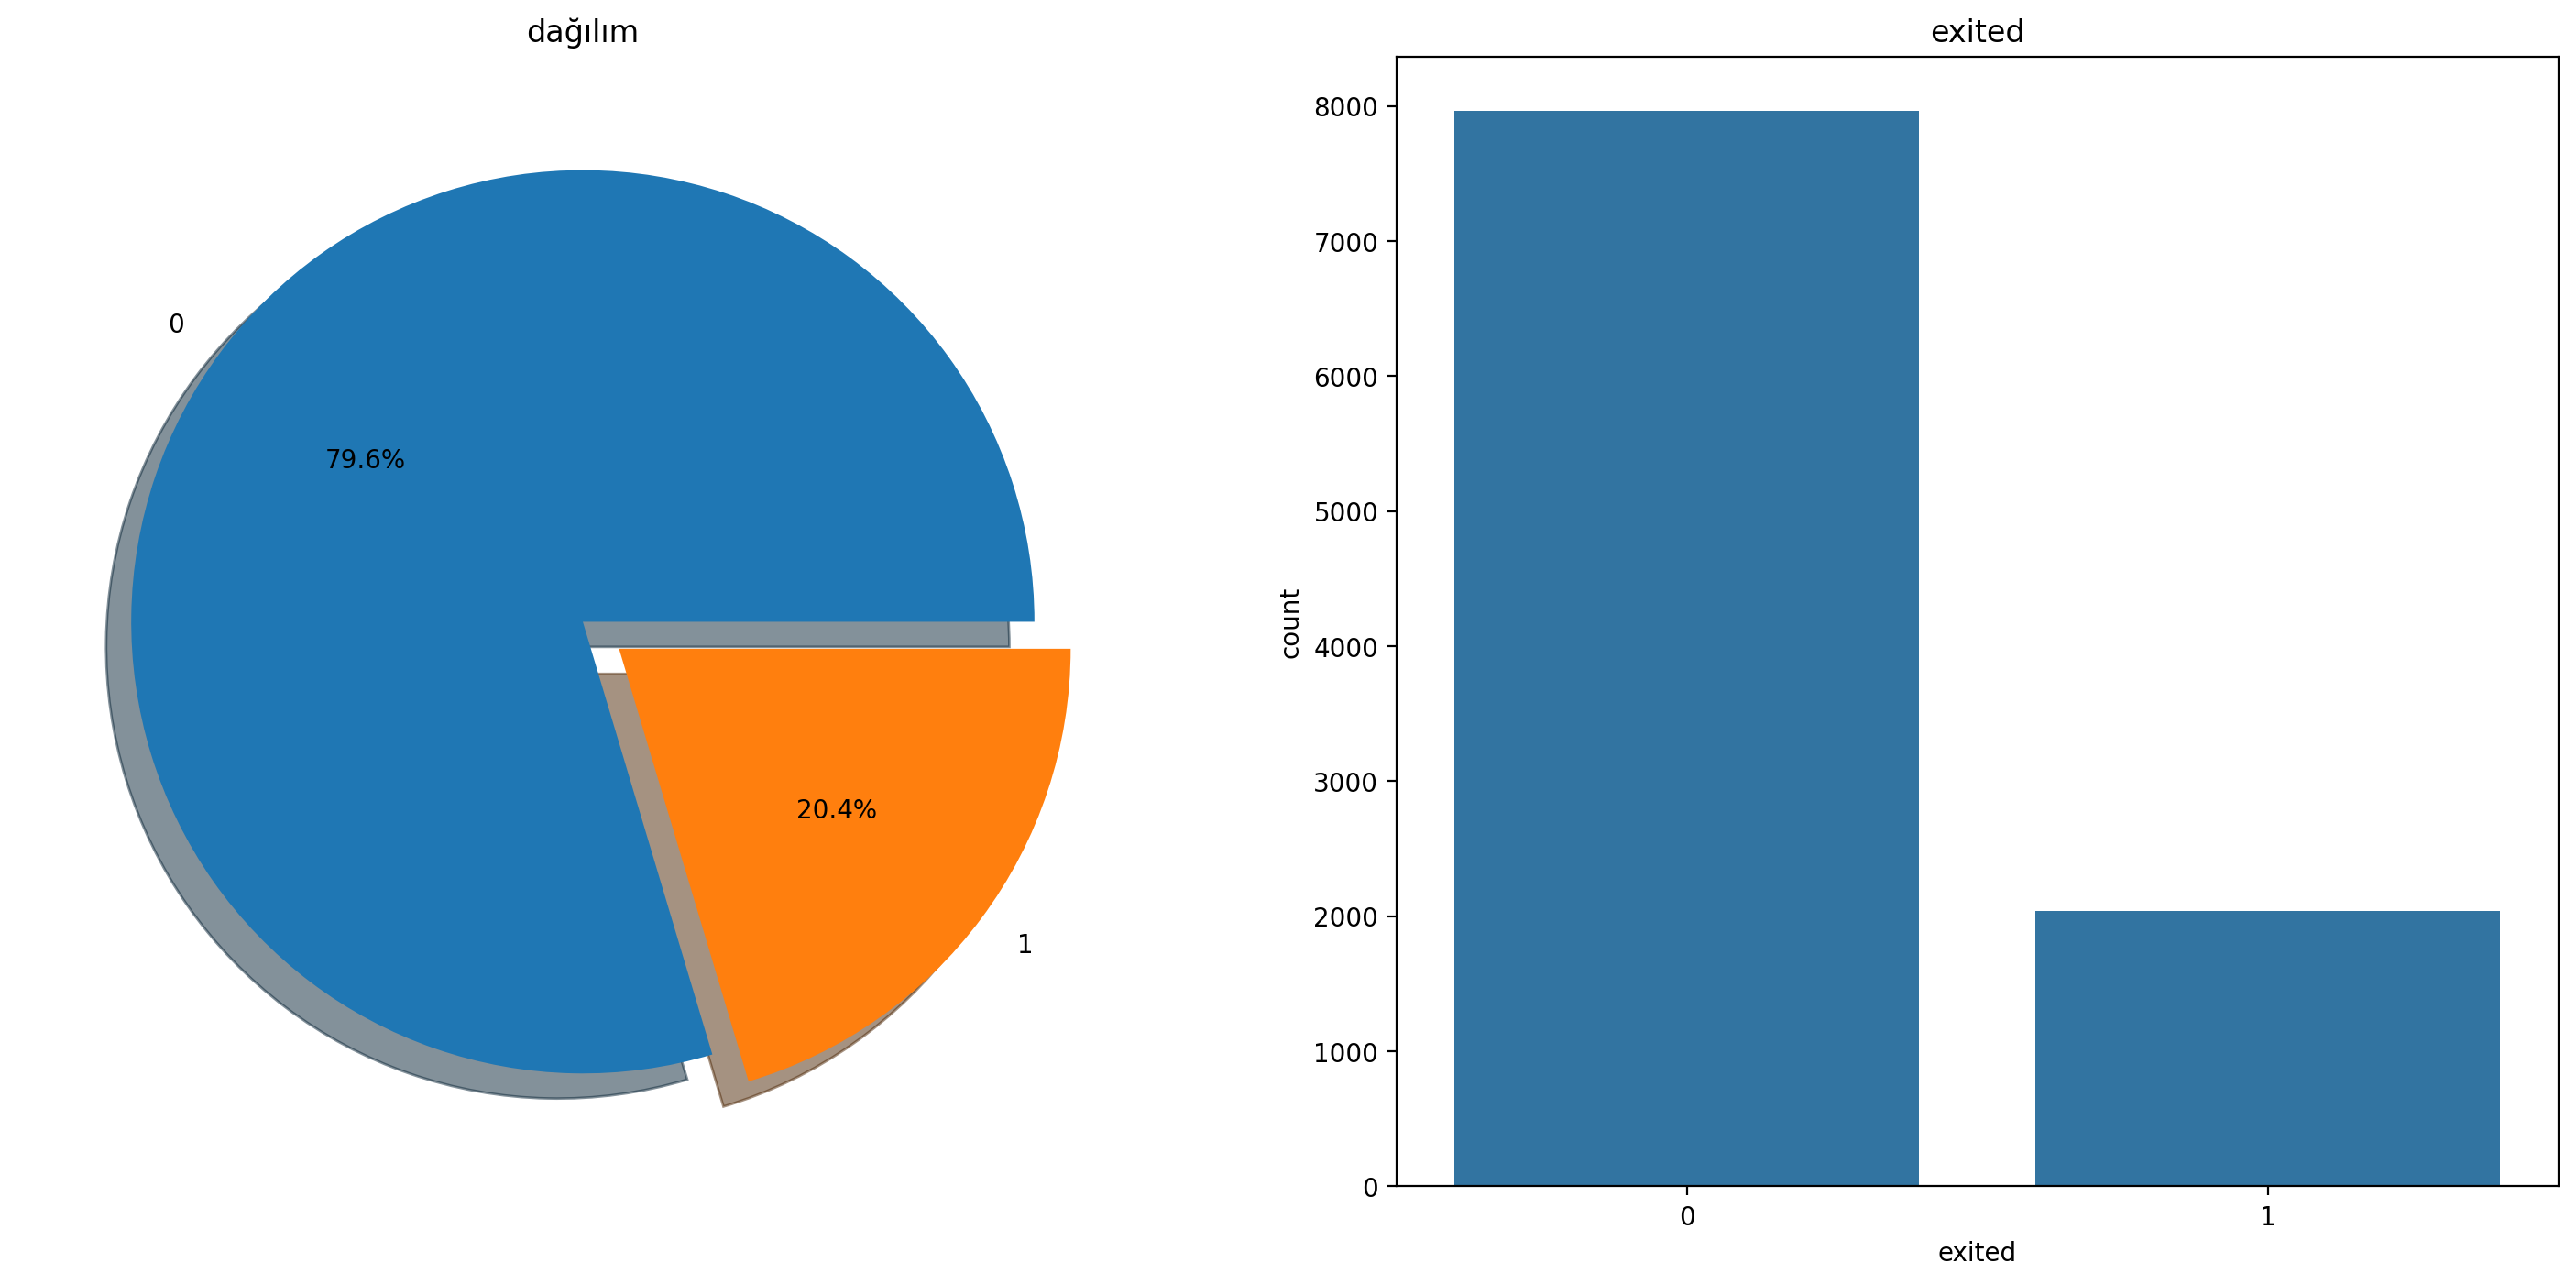

In [78]:
# The distribution of the dependent variable in the dataset is plotted as pie and columns graphs.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dağılım')
ax[0].set_ylabel('')
# The 'x' argument is already implicitly set to the 'exited' column by providing 'data=df'
sns.countplot(x='exited', data=df, ax=ax[1])
ax[1].set_title('exited')
plt.show()

<Axes: xlabel='isactivemember', ylabel='count'>

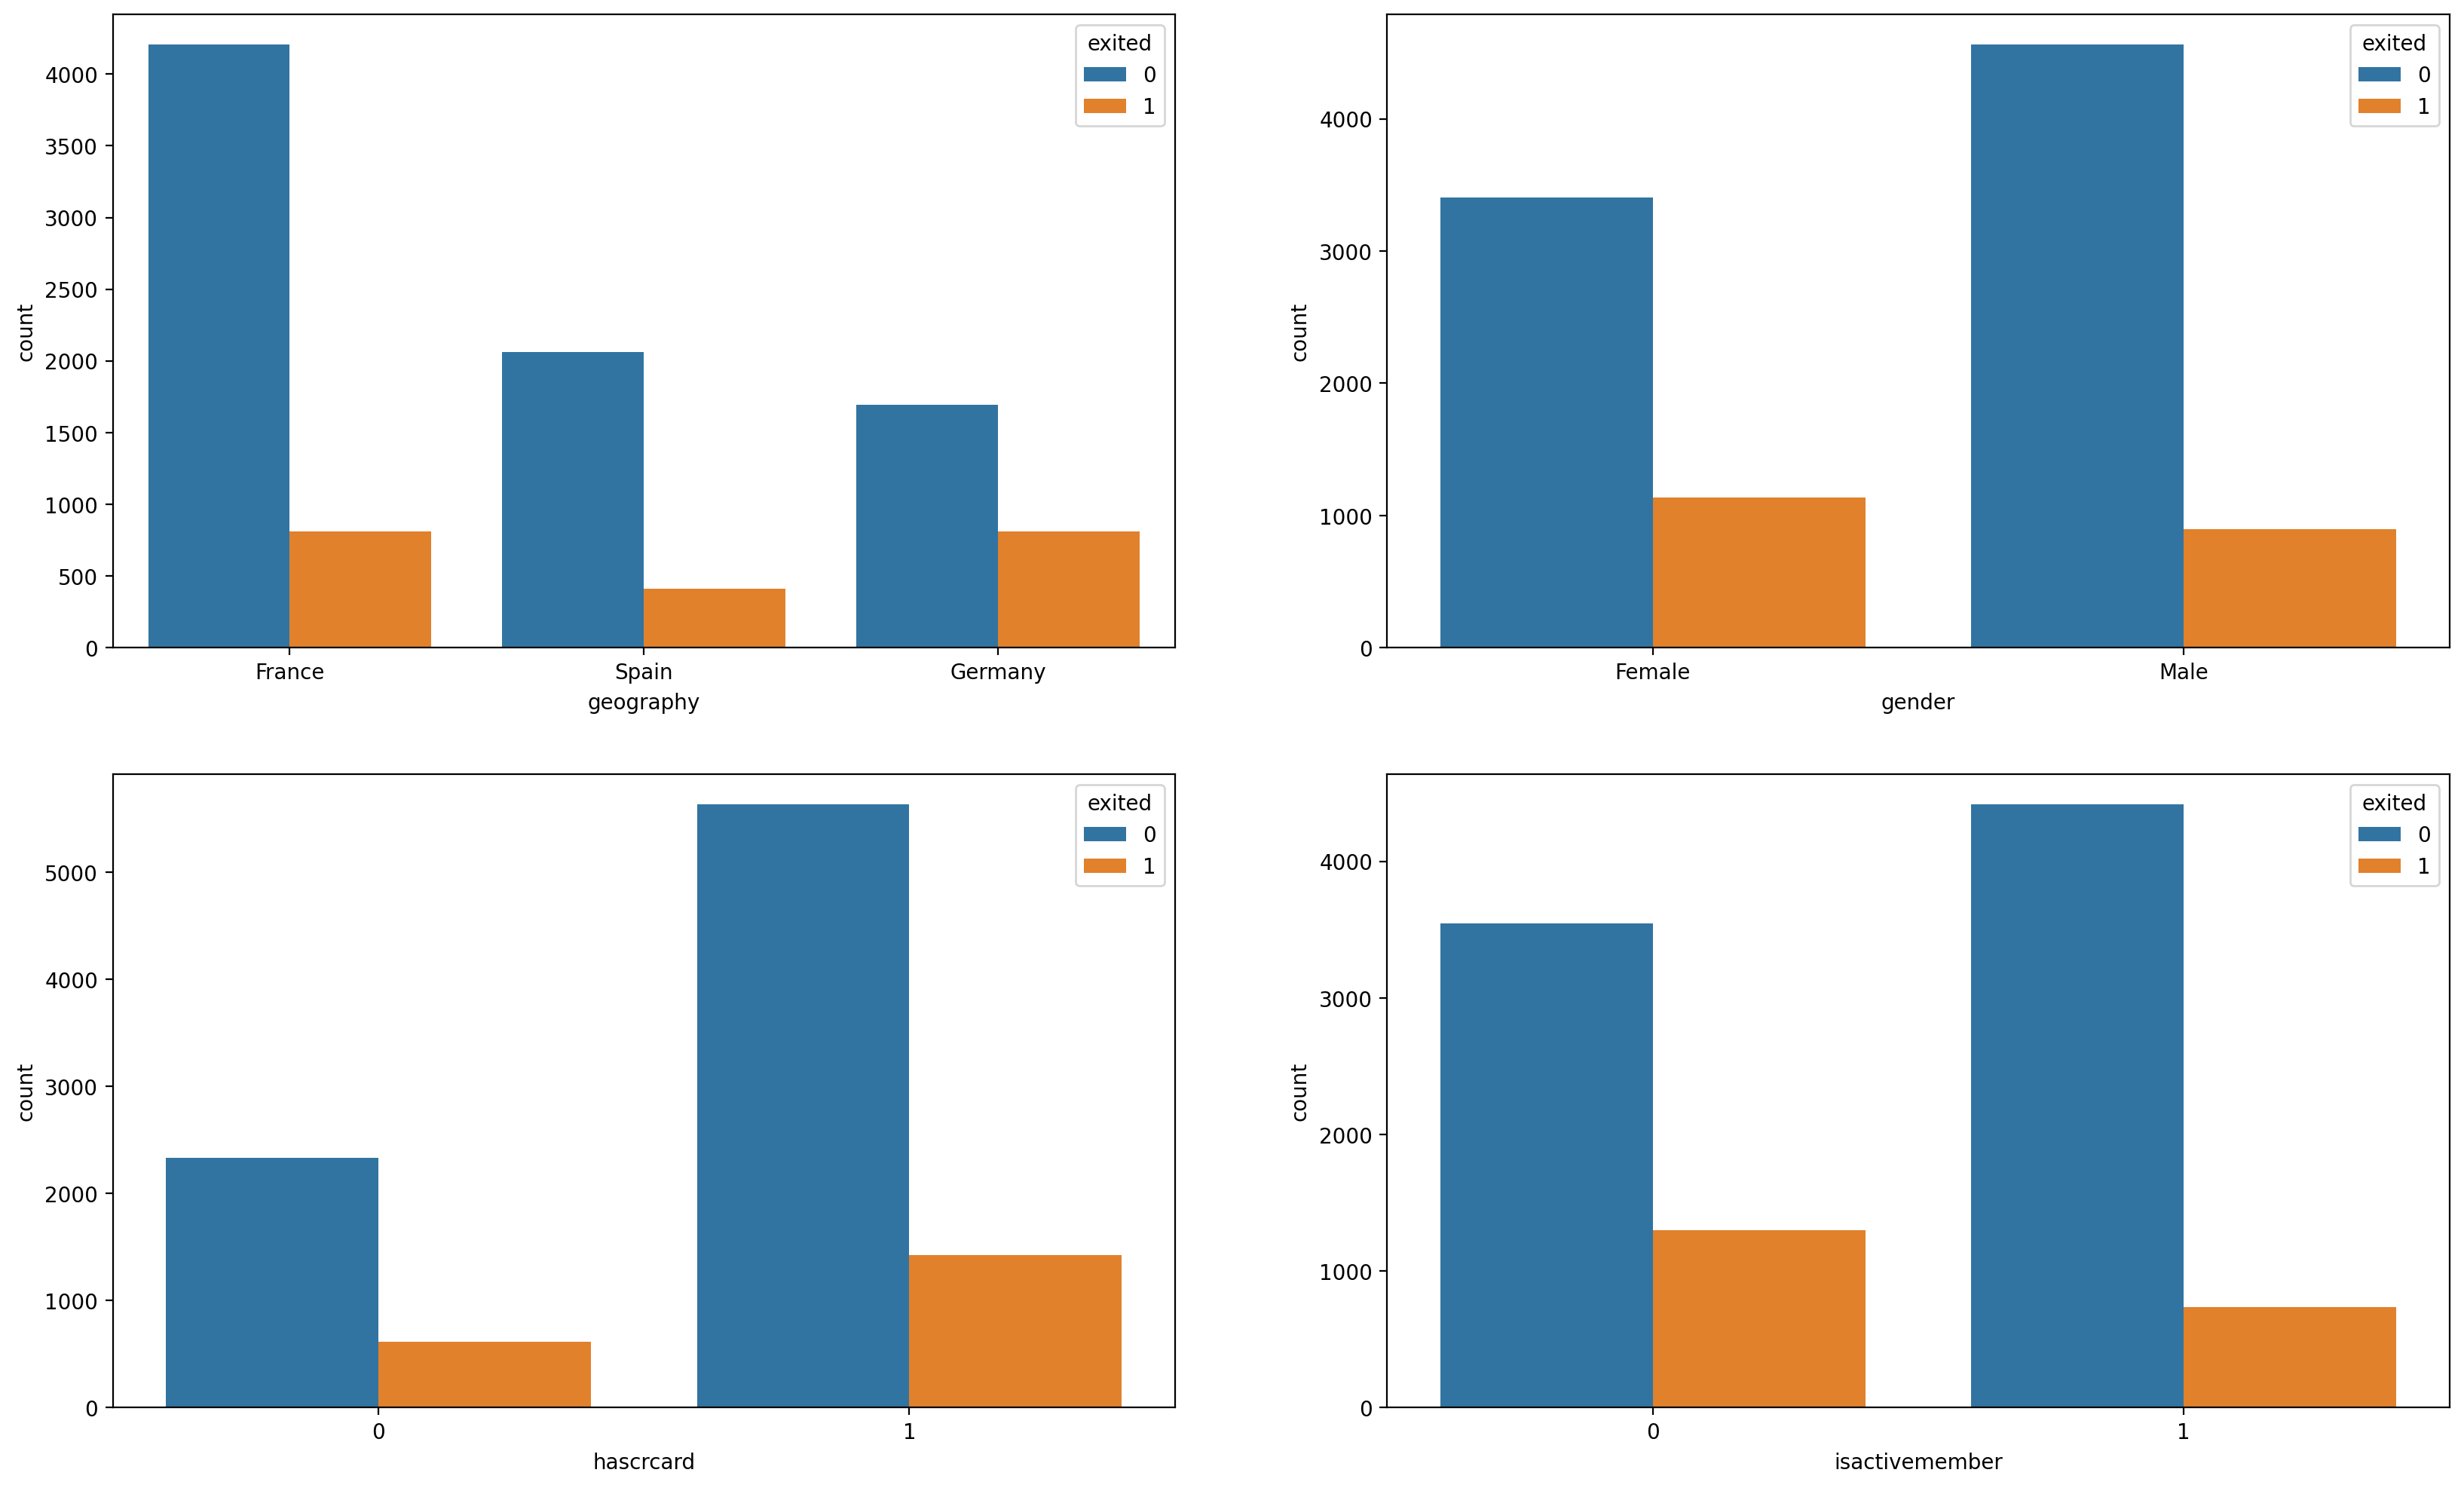

In [79]:
# Plotted the categorical variables on the basis of the graph of the column according to the dependent variable.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='geography', hue = 'exited',data = df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'exited',data = df, ax=axarr[0][1])
sns.countplot(x='hascrcard', hue = 'exited',data = df, ax=axarr[1][0])
sns.countplot(x='isactivemember', hue = 'exited',data = df, ax=axarr[1][1])

In [82]:
import plotly.express as px

# Group data and reset index to make 'count' a column
grouped_data = df.groupby(["gender", "exited"])["exited"].count().reset_index(name="count")

# Define custom names for the pie chart slices
names = ["Female,0", "Female,1", "Male,0", "Male,1"]

# Define colors for each slice, matching the order of 'names'
colors = ["pink", "red", "lightblue", "blue"]  # Example colors

# Create the pie chart
fig = px.pie(
    grouped_data,
    values="count",  # Specify the column containing the numerical data
    names=names,  # Use the custom names
    color_discrete_sequence=colors  # Assign the custom colors
)
fig.show()

In [83]:
# Dependent variable was plotted according to age and geography variable.
import plotly.express as px
fig = px.bar(df,y = "exited", x = "age" , color = "geography")
fig.show()

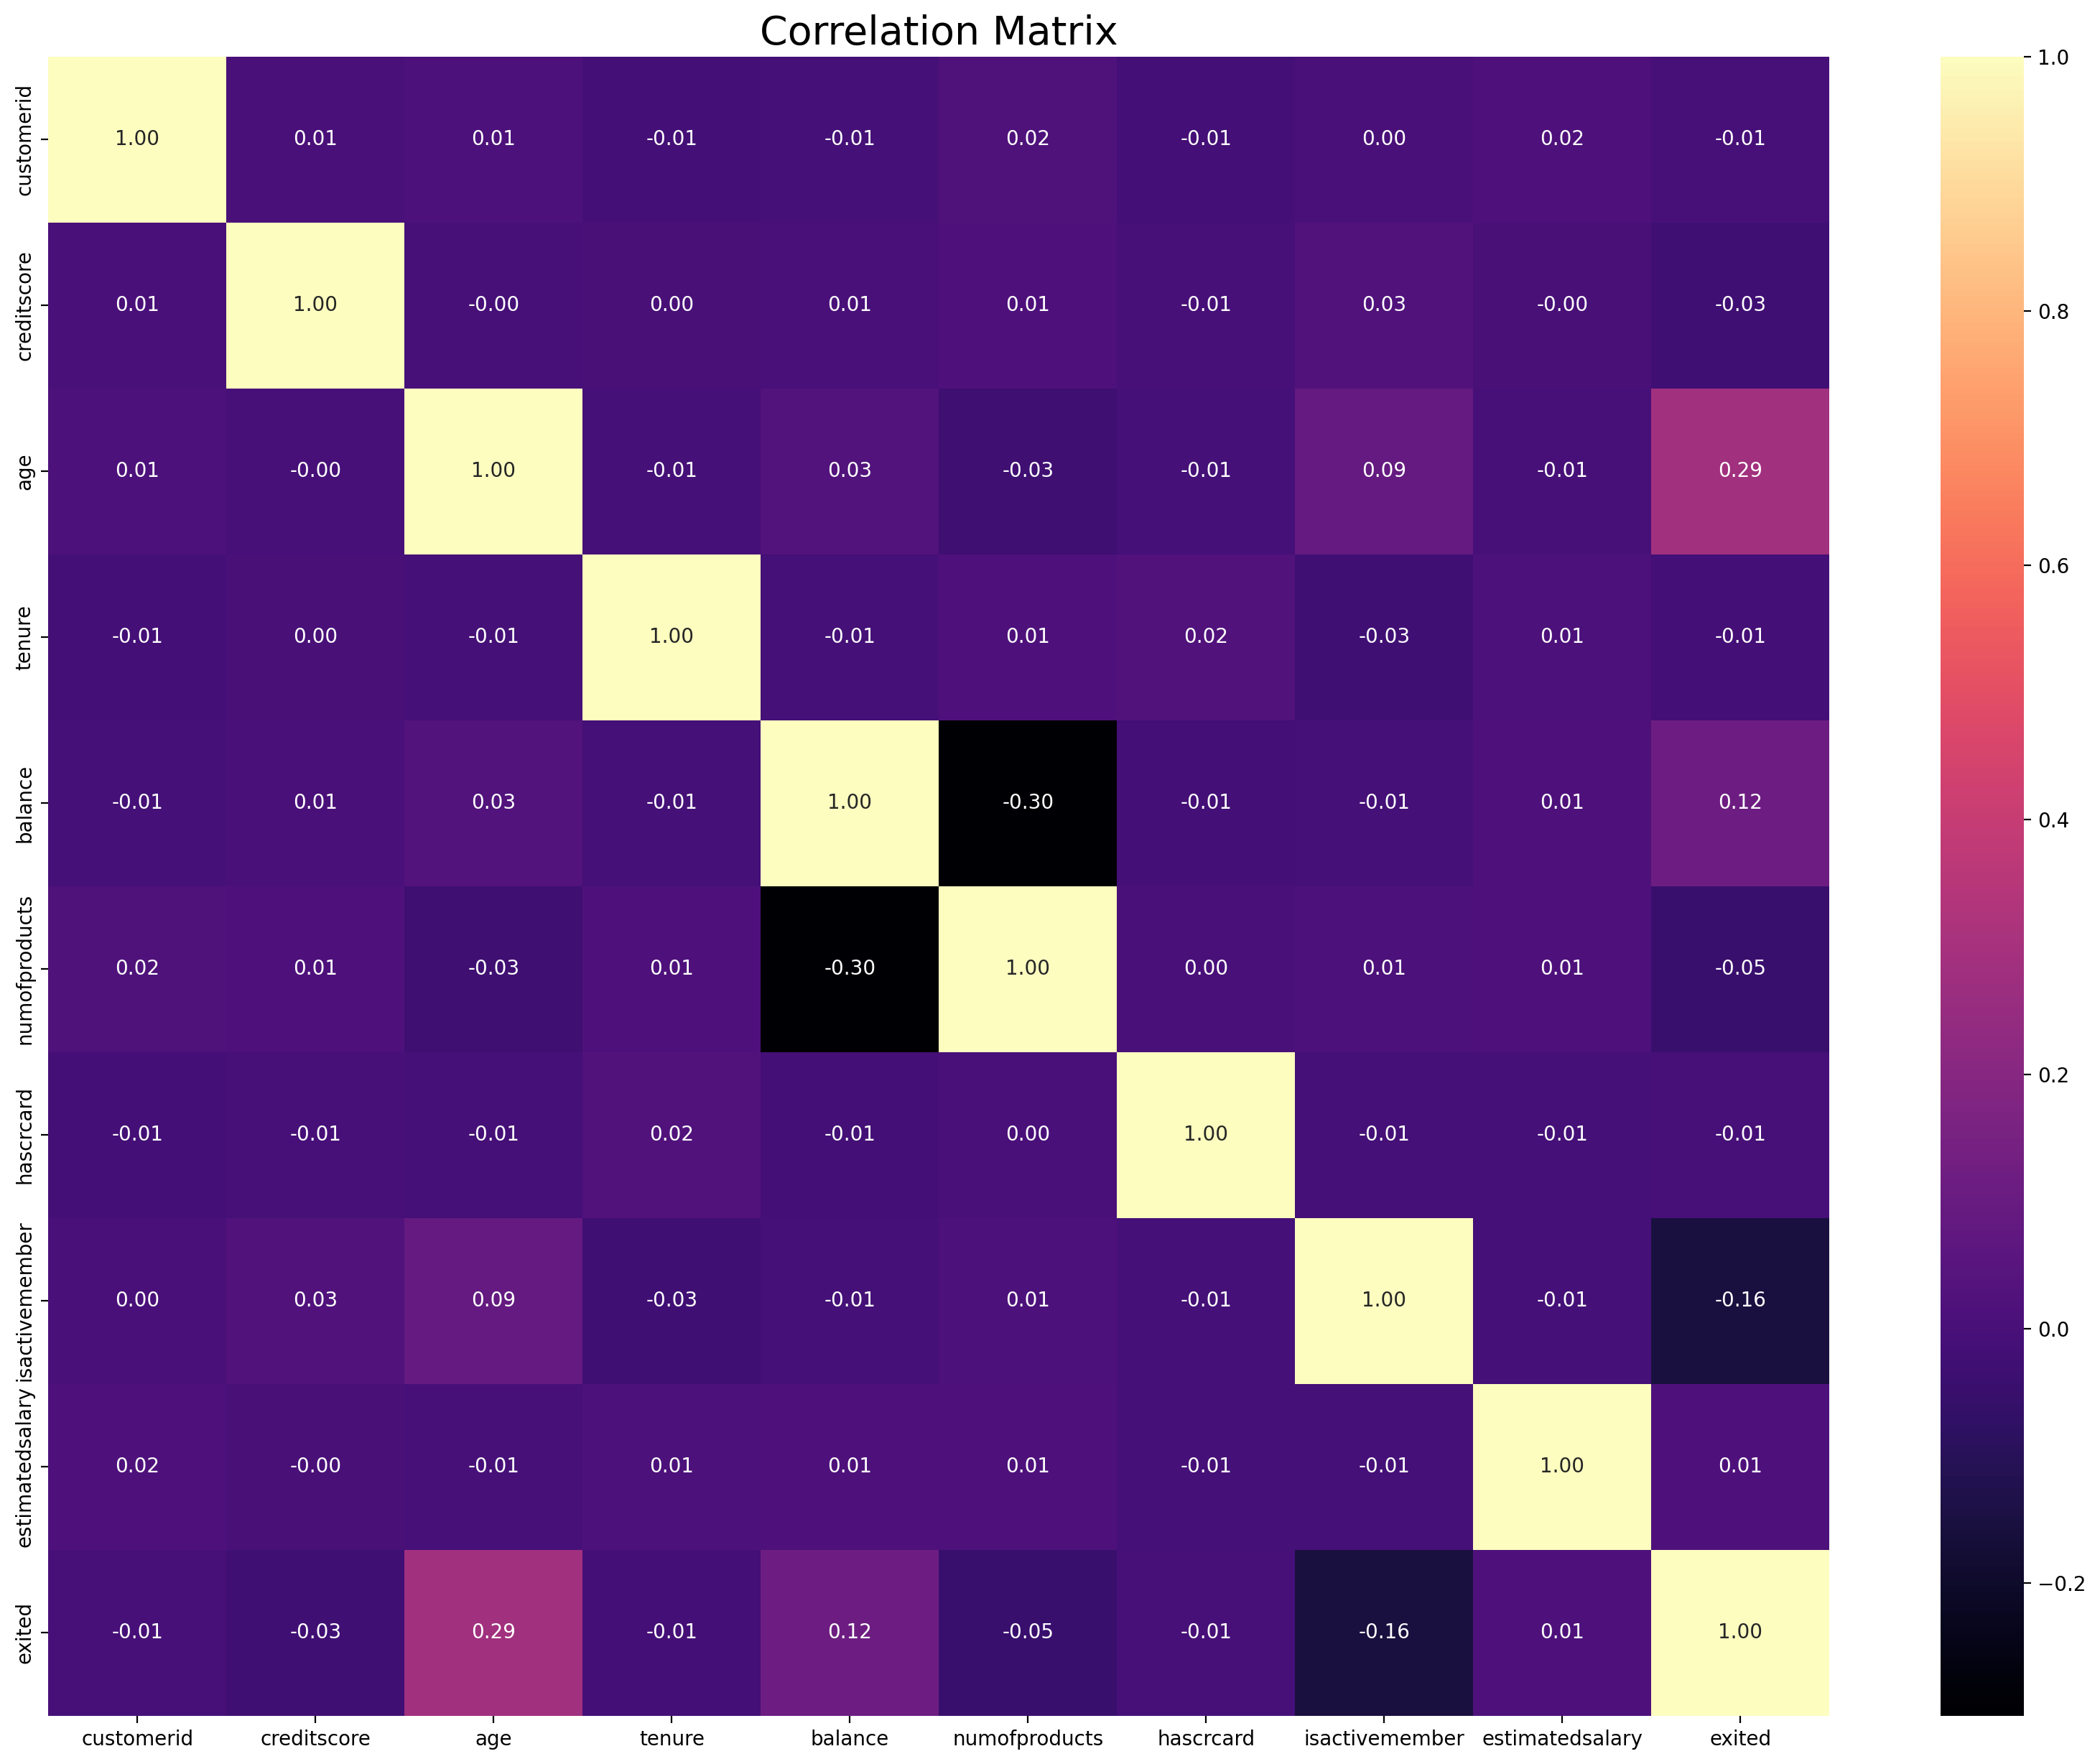

In [85]:
# Correlation Matrix
f, ax = plt.subplots(figsize= [20,15])

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

<Axes: xlabel='exited', ylabel='estimatedsalary'>

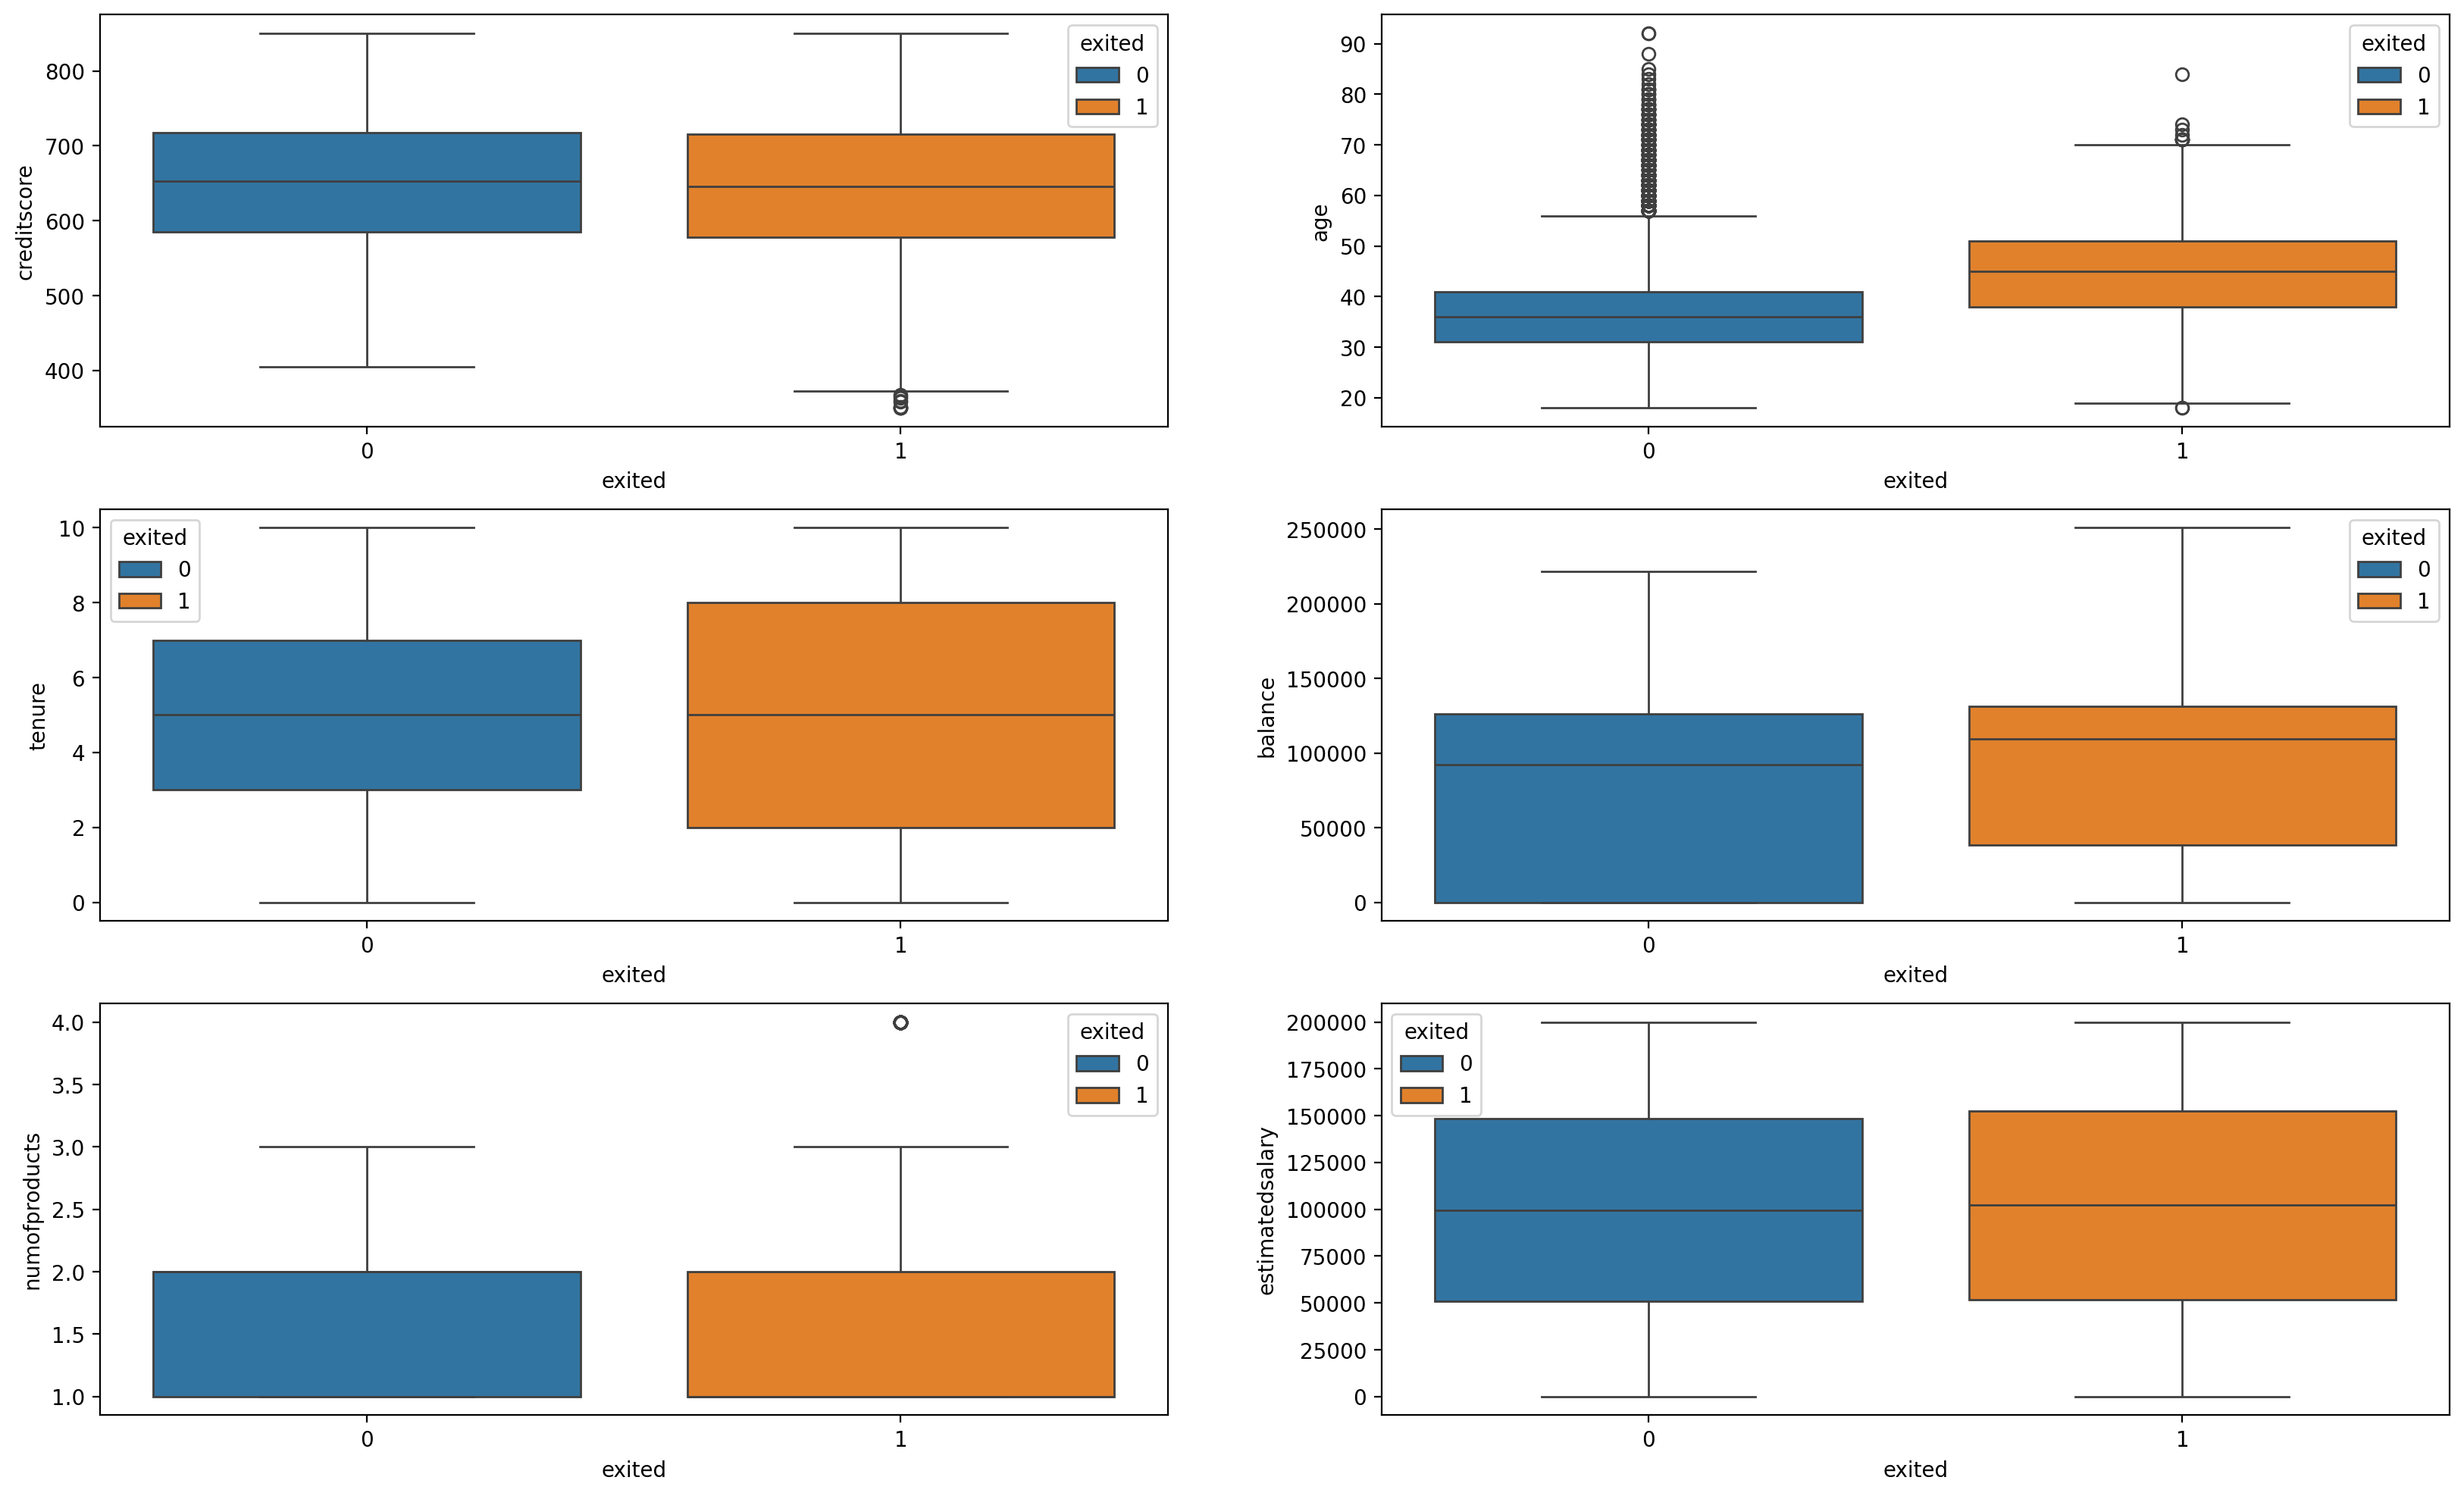

In [86]:
# Boxplot graph for outlier observation analysis
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='creditscore',x = 'exited', hue = 'exited',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'exited', hue = 'exited',data = df , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'exited', hue = 'exited',data = df, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'exited', hue = 'exited',data = df, ax=axarr[1][1])
sns.boxplot(y='numofproducts',x = 'exited', hue = 'exited',data = df, ax=axarr[2][0])
sns.boxplot(y='estimatedsalary',x = 'exited', hue = 'exited',data = df, ax=axarr[2][1])

In [87]:
# Missing Observation Analysis
df.isnull().sum()

,0
customerid,0
surname,0
creditscore,0
geography,0
gender,0
age,0
tenure,0
balance,0
numofproducts,0
hascrcard,0


In [89]:
# Outlier Observation Analysis
for feature in ['creditscore','tenure', 'balance','estimatedsalary']: # iterate over column names directly

    # Select the column as a Series
    column_data = df[feature]

    # Check if the column is numeric, if not skip to the next column
    if not pd.api.types.is_numeric_dtype(column_data):
        print(f"Skipping outlier check for {feature} as it's not numeric.")
        continue

    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if (column_data > upper).any():  # Use .any() on the Series directly
        print(feature,"yes")
    else:
        print(feature, "no")

creditscore no
tenure no
balance no
estimatedsalary no


In [90]:
df["NewAGT"] = df["age"] - df["tenure"]
df["CreditsScore"] = pd.qcut(df['creditscore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["AgeScore"] = pd.qcut(df['age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["BalanceScore"] = pd.qcut(df['balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["EstSalaryScore"] = pd.qcut(df['estimatedsalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df["NewEstimatedSalary"] = df["estimatedsalary"] / 12

In [91]:
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAge,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
RowNumber,,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(40.0, 46.0]",40,4,6,1,6,8445.740000
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(40.0, 46.0]",40,4,6,5,6,9378.548333
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(40.0, 46.0]",34,1,6,10,6,9494.297500
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(35.0, 40.0]",38,7,5,1,5,7818.885833
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(40.0, 46.0]",41,10,6,8,4,6590.341667


In [92]:
df = pd.get_dummies(df, columns =["geography", "gender"], drop_first = True)

In [93]:
df.head()

,customerid,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAge,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,geography_Germany,geography_Spain,gender_Male
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,"(40.0, 46.0]",40,4,6,1,6,8445.740000,False,False,False
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,"(40.0, 46.0]",40,4,6,5,6,9378.548333,False,True,False
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,"(40.0, 46.0]",34,1,6,10,6,9494.297500,False,False,False
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,"(35.0, 40.0]",38,7,5,1,5,7818.885833,False,False,False
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,"(40.0, 46.0]",41,10,6,8,4,6590.341667,False,True,False


In [94]:
df = df.drop(["customerid","surname","NewAge"], axis = 1)

In [95]:
df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,geography_Germany,geography_Spain,gender_Male
RowNumber,,,,,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,40,4,6,1,6,8445.740000,False,False,False
2,608,41,1,83807.86,1,0,1,112542.58,0,40,4,6,5,6,9378.548333,False,True,False
3,502,42,8,159660.80,3,1,0,113931.57,1,34,1,6,10,6,9494.297500,False,False,False
4,699,39,1,0.00,2,0,0,93826.63,0,38,7,5,1,5,7818.885833,False,False,False
5,850,43,2,125510.82,1,1,1,79084.10,0,41,10,6,8,4,6590.341667,False,True,False


In [96]:
cat_df = df[["geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"]]

In [97]:
cat_df.head()

,geography_Germany,geography_Spain,gender_Male,hascrcard,isactivemember
RowNumber,,,,,
1,False,False,False,1,1
2,False,True,False,0,1
3,False,False,False,1,0
4,False,False,False,0,0
5,False,True,False,1,1


In [98]:
y = df["exited"]
X = df.drop(["exited","geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"], axis = 1)
cols = X.columns
index = X.index

In [99]:
X.head()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,101348.88,40,4,6,1,6,8445.740000
2,608,41,1,83807.86,1,112542.58,40,4,6,5,6,9378.548333
3,502,42,8,159660.80,3,113931.57,34,1,6,10,6,9494.297500
4,699,39,1,0.00,2,93826.63,38,7,5,1,5,7818.885833
5,850,43,2,125510.82,1,79084.10,41,10,6,8,4,6590.341667


In [100]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [101]:
X = pd.concat([X,cat_df], axis = 1)

In [102]:
X.head()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,geography_Germany,geography_Spain,gender_Male,hascrcard,isactivemember
RowNumber,,,,,,,,,,,,,,,,,
1,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,0.666667,-0.2,0.50,-0.9,0.1,0.011739,False,False,False,1,1
2,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,0.666667,-0.2,0.50,-0.1,0.1,0.125512,False,True,False,0,1
3,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,0.166667,-0.8,0.50,0.9,0.1,0.139630,False,False,False,1,0
4,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,0.500000,0.4,0.25,-0.9,-0.1,-0.064717,False,False,False,0,0
5,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,0.750000,1.0,0.50,0.5,-0.3,-0.214561,False,True,False,1,1


In [103]:
y.head()

,exited
RowNumber,
1,1
2,0
3,1
4,0
5,0


In [104]:
print(X.shape, y.shape)

(10000, 17) (10000,)


In [105]:
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=12345)


In [107]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
# Oversample training data
# Use fit_resample instead of fit_sample
X_train, y_train = smk.fit_resample(X_train, y_train)

# Oversample validation data
# Use fit_resample instead of fit_sample
X_test, y_test = smk.fit_resample(X_test, y_test)

In [108]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12714, 17) (3130, 17) (12714,) (3130,)


In [109]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

# evaluate each model in turn
results = []
names = []

In [110]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.741853)
KNN: (0.749201)
CART: (0.811821)
RF: (0.859744)
SVM: (0.808307)
XGB: (0.891374)
[LightGBM] [Info] Number of positive: 6357, number of negative: 6357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3070
[LightGBM] [Info] Number of data points in the train set: 12714, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM: (0.907987)
CatBoost: (0.911502)


In [111]:
models2 = []
models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))
models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

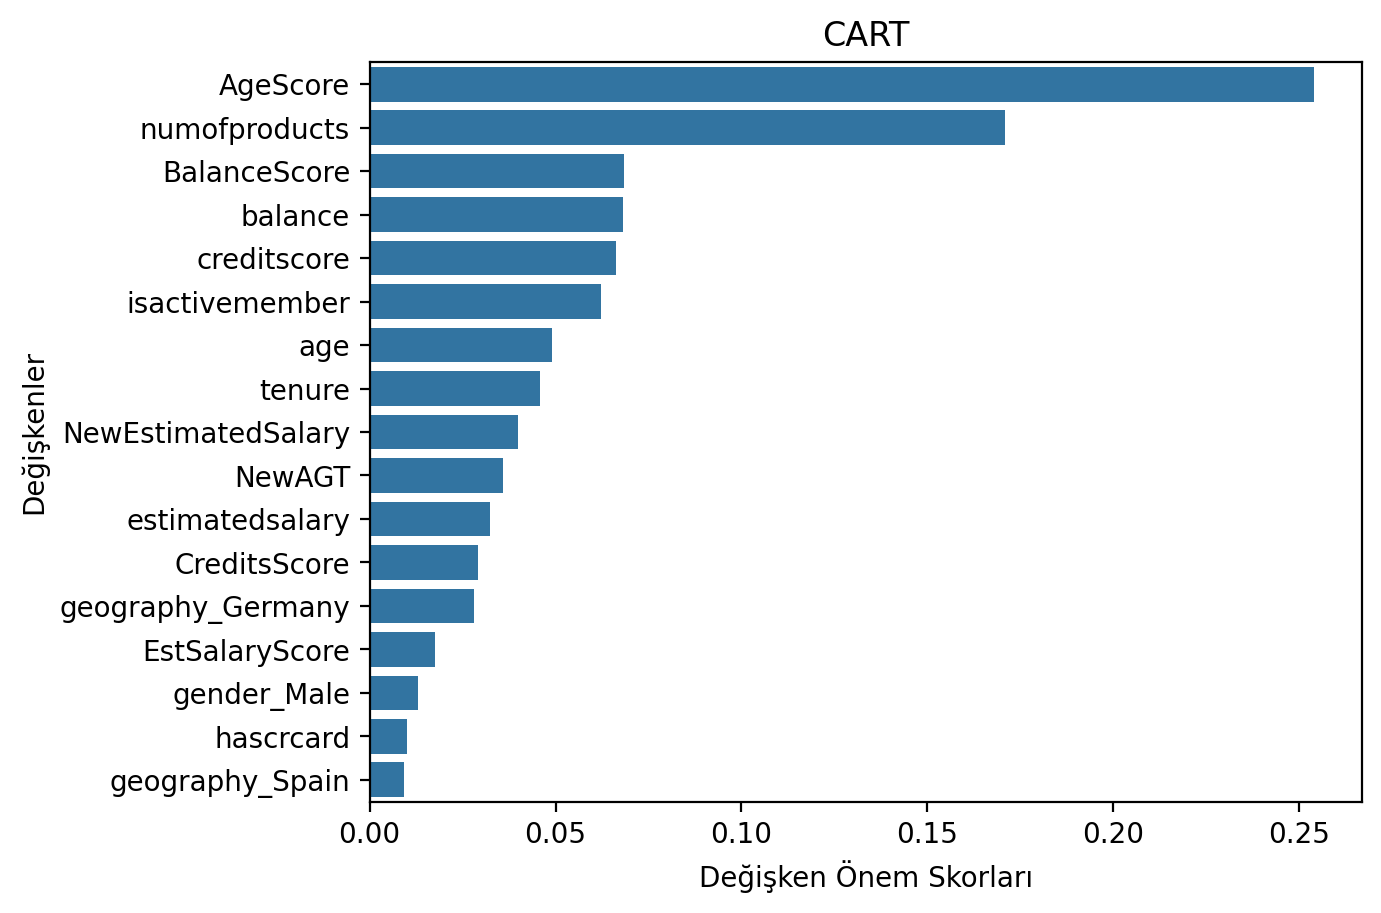

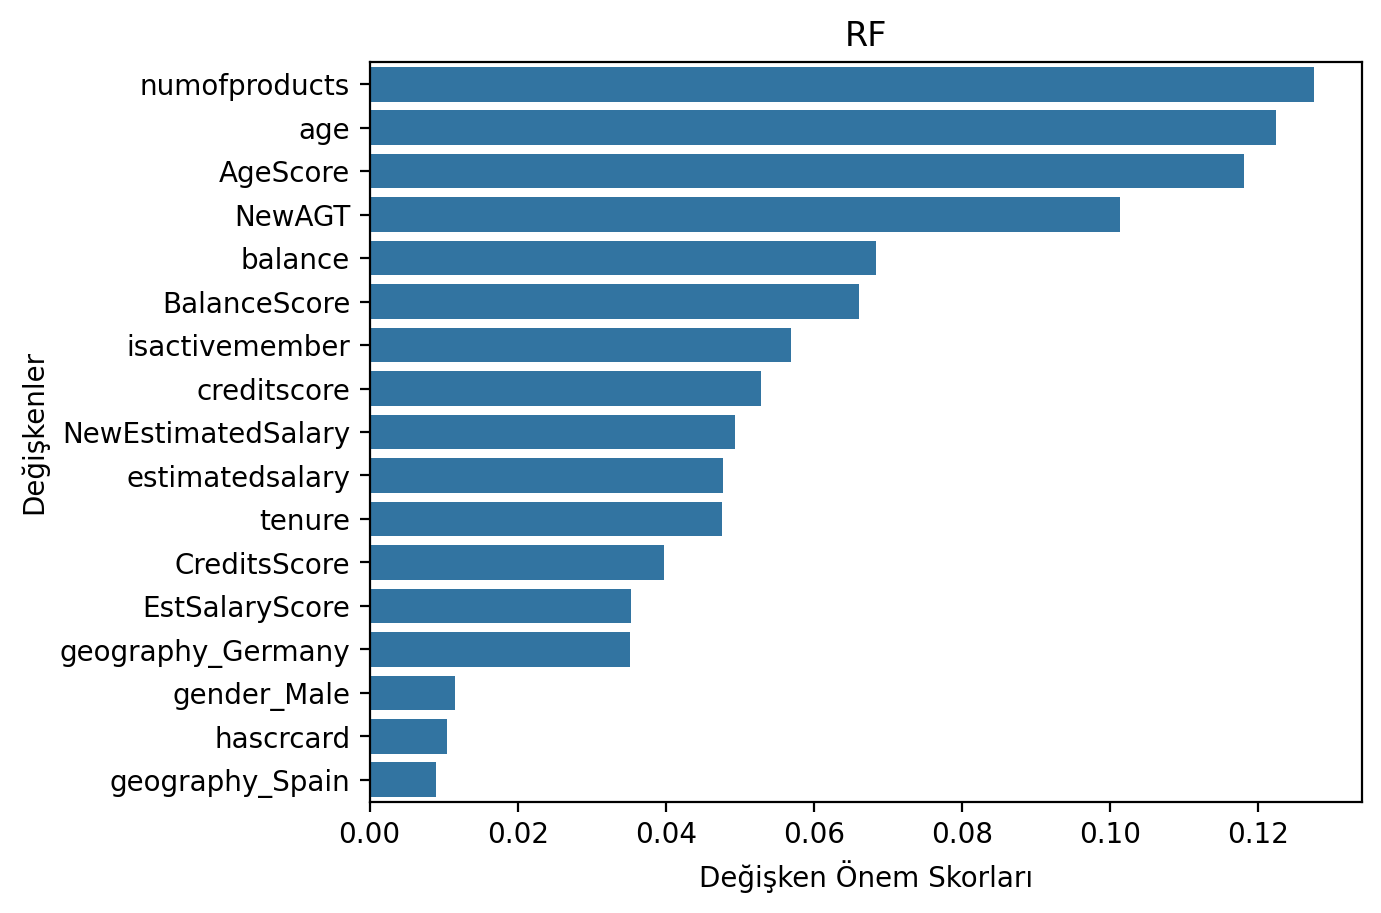

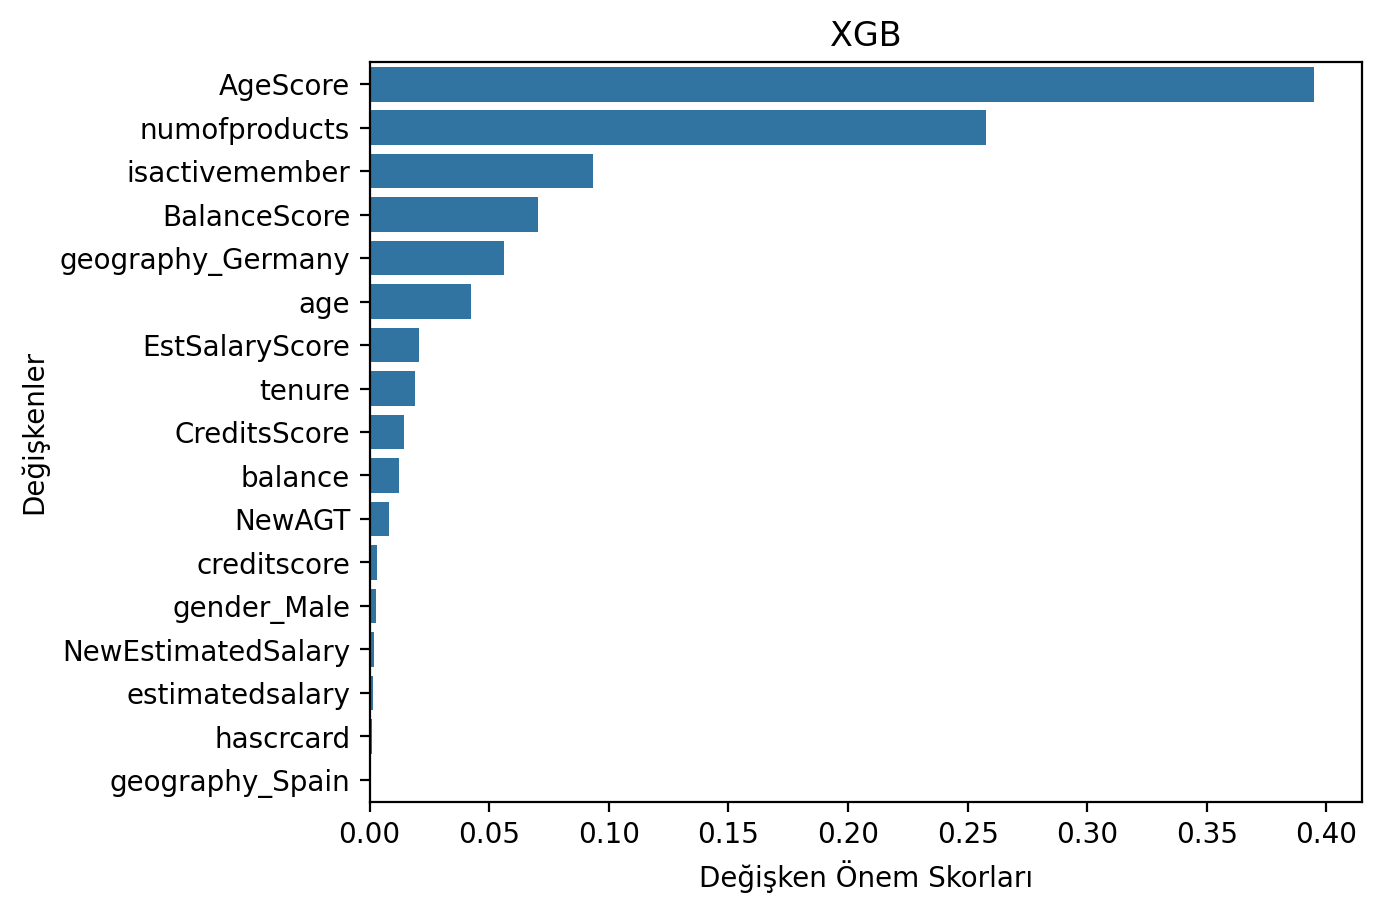

[LightGBM] [Info] Number of positive: 6357, number of negative: 6357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3070
[LightGBM] [Info] Number of data points in the train set: 12714, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


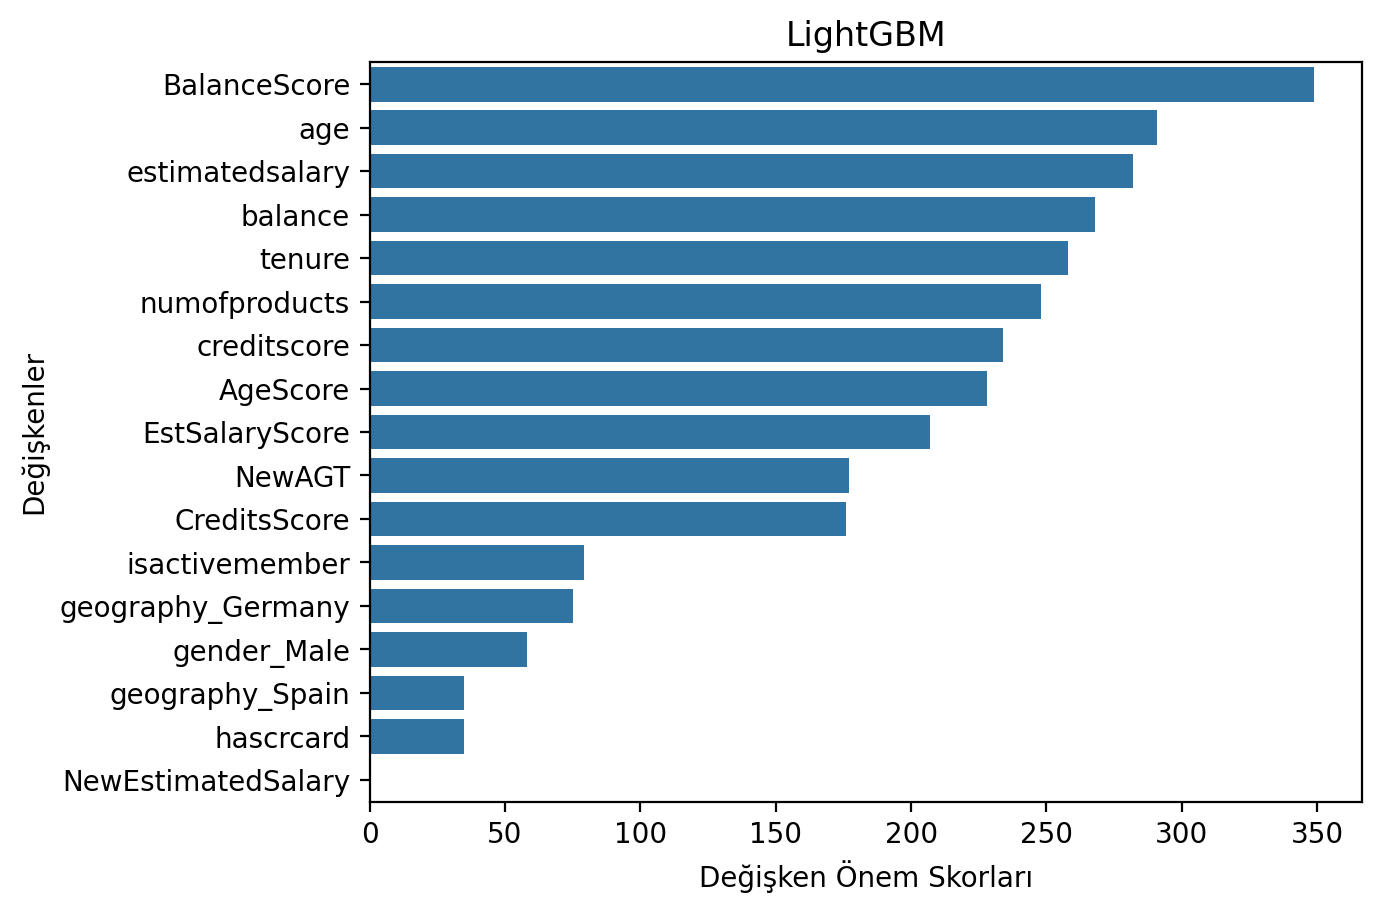

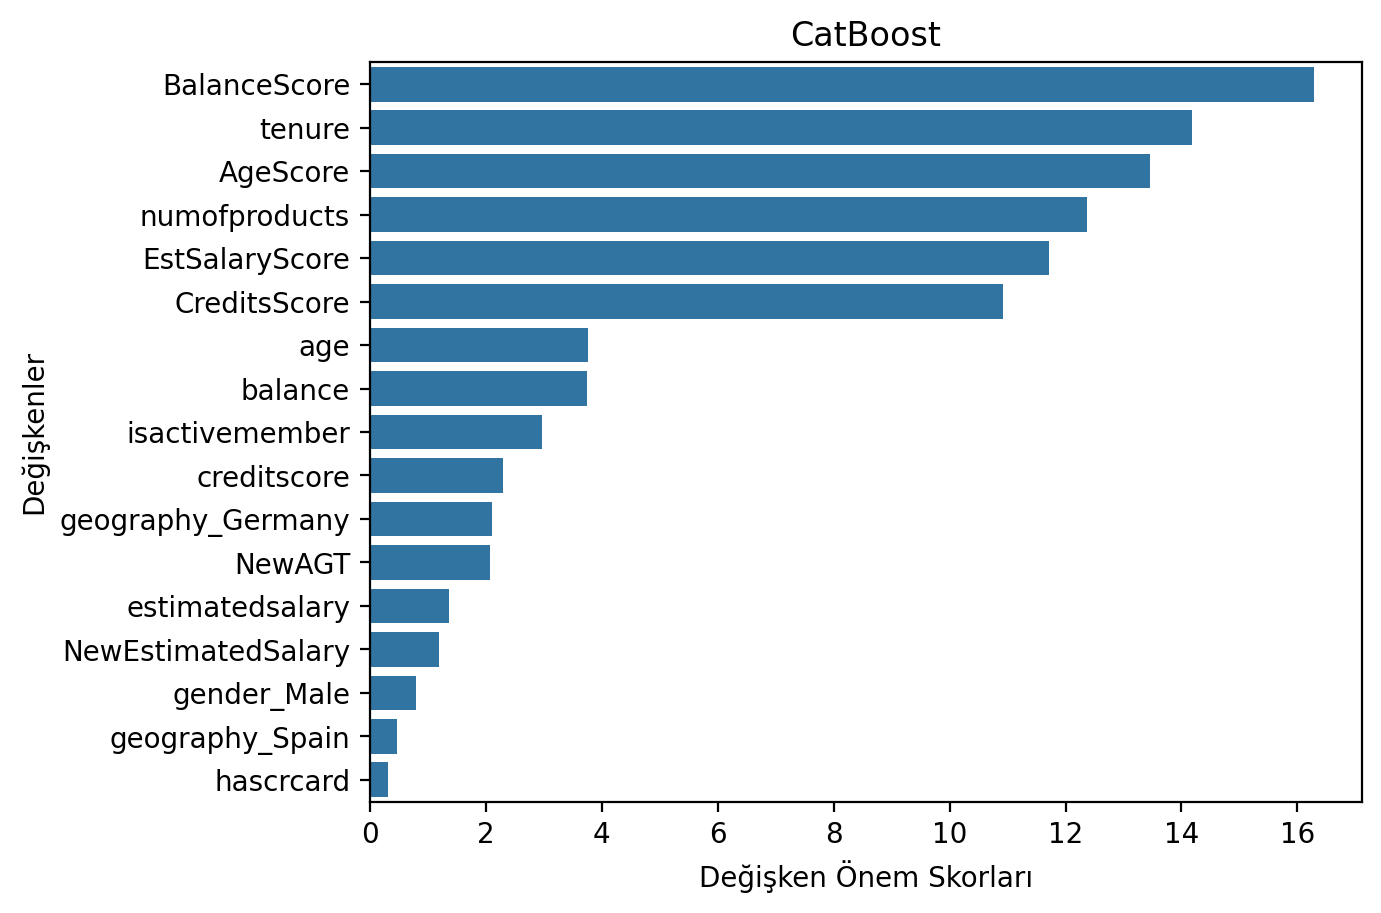

In [112]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

In [113]:
# Hyperparameters have previously been obtained with the help of GridSearchCV.
models = []
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

XGB: (0.910543)
[LightGBM] [Info] Number of positive: 6357, number of negative: 6357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3070
[LightGBM] [Info] Number of data points in the train set: 12714, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Info] Number of positive: 6357, number of negative: 6357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3070
[LightGBM] [Info] Number of data points in the train set: 12714, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

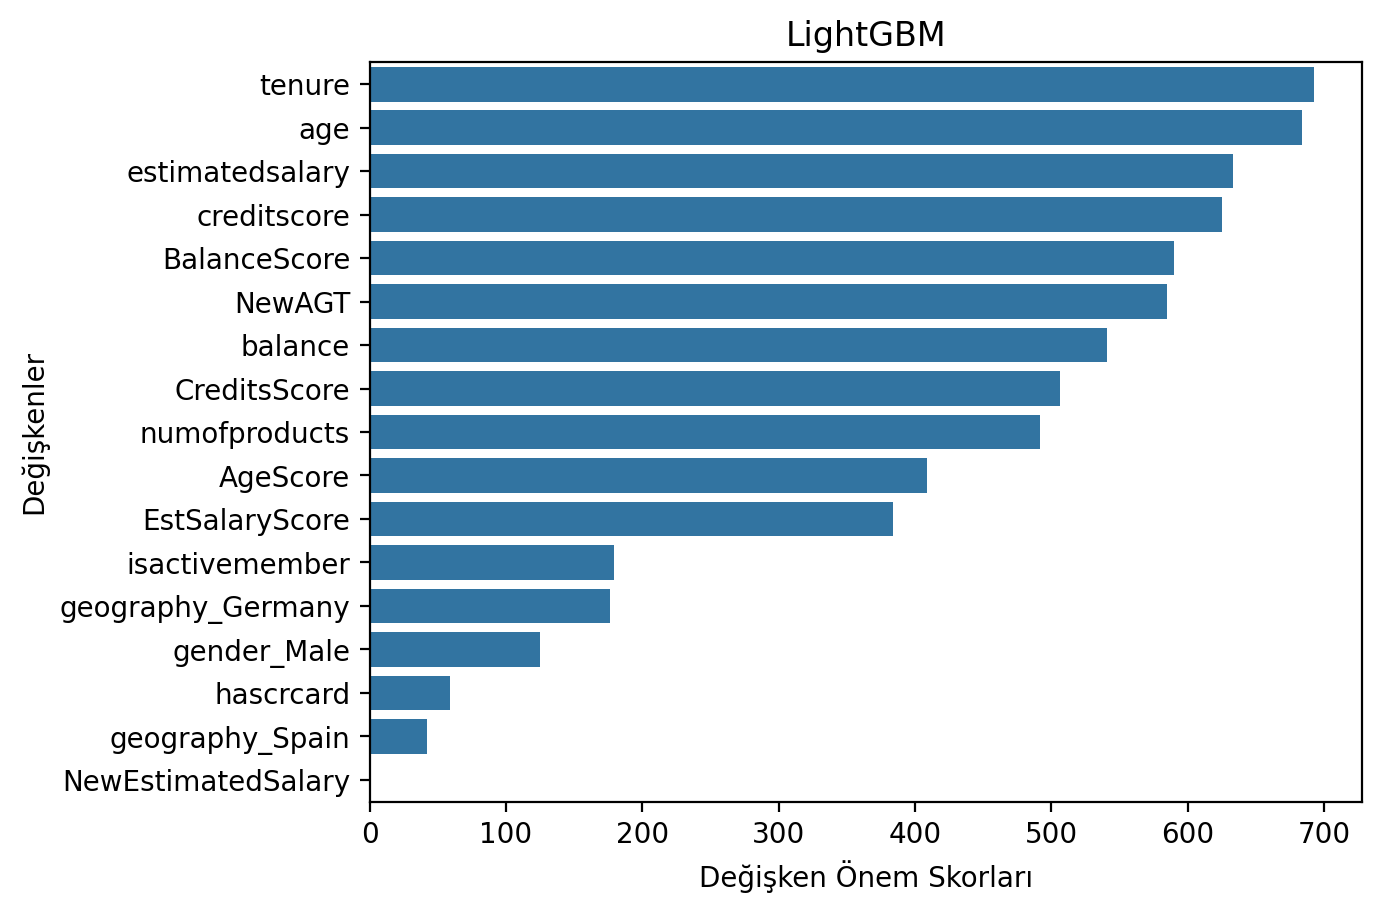

In [114]:
models2 = []
models2.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

In [115]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
y_pred = model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

TP = cm_xgb[1, 1]
TN = cm_xgb[0, 0]
FP = cm_xgb[0, 1]
FN = cm_xgb[1, 0]

In [116]:
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

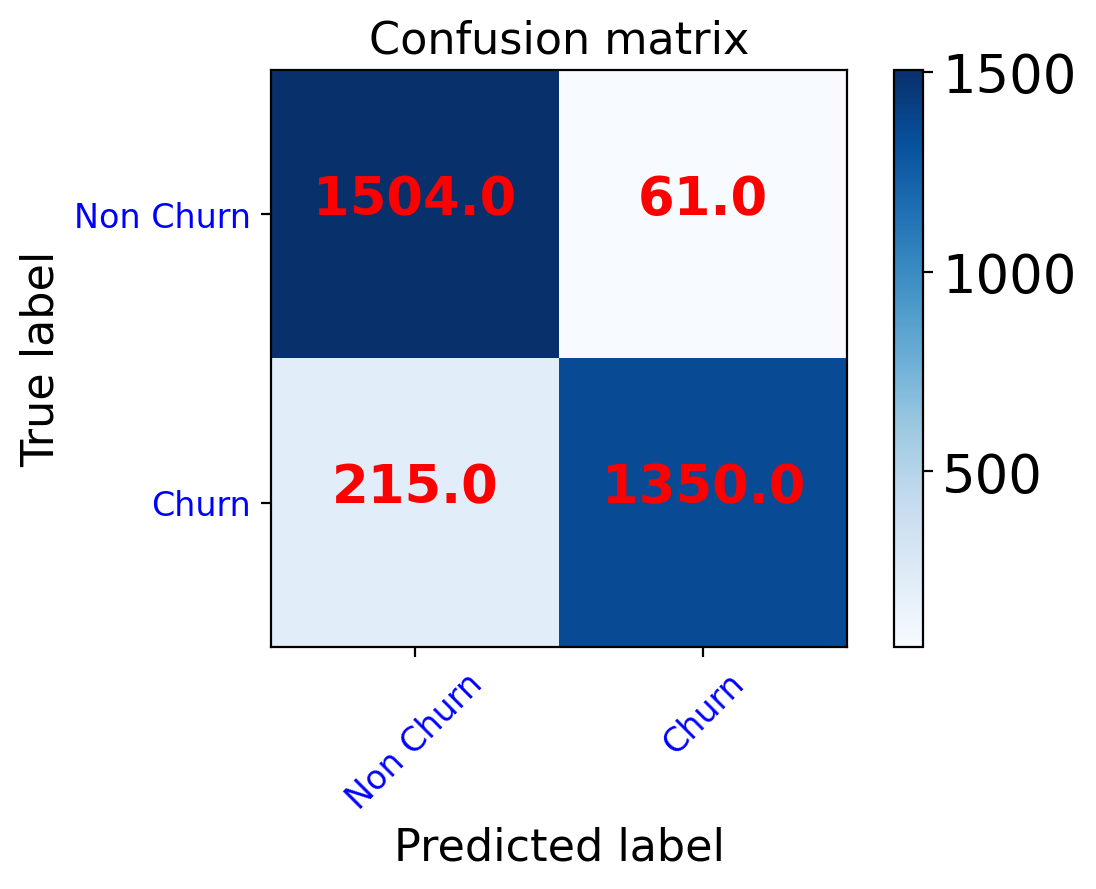

In [117]:
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],
                      title='Confusion matrix')

In [118]:
tn, fp, fn, tp = cm_xgb.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1504
False Positives:  61
False Negatives:  215
True Positives:  1350


In [119]:
df_pred = pd.DataFrame(data=[],columns=["y_test"])
df_pred["y_pred"] = y_pred
df_pred["y_test"] = y_test
df_pred.index = df_pred.index + 1
df_pred.head()

,y_test,y_pred
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0


In [120]:
FP_predicts_indexes = []
TP_predicts_indexes=[]
FN_predict_indexes =[]
TN_predicts_indexes  = []
for index, row in df_pred.iterrows():
    if row['y_test'] == 0 and row['y_pred'] == 1:
        FP_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 1:
        TP_predicts_indexes.append(row.name)
    elif row['y_test'] == 0 and row['y_pred'] == 0:
        TN_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 0:
        FN_predict_indexes.append(row.name)

In [121]:
df_pred.loc[TN_predicts_indexes,"prediction_result"] = "TN"
df_pred.loc[TP_predicts_indexes,"prediction_result"] = "TP"
df_pred.loc[FP_predicts_indexes,"prediction_result"] = "FP"
df_pred.loc[FN_predict_indexes,"prediction_result"] = "FN"
df_pred.head()

,y_test,y_pred,prediction_result
1,0,1,FP
2,0,0,TN
3,0,0,TN
4,0,0,TN
5,0,0,TN


In [122]:
df_pred[df_pred["prediction_result"] == "FP"].head()

,y_test,y_pred,prediction_result
1,0,1,FP
29,0,1,FP
69,0,1,FP
80,0,1,FP
105,0,1,FP


In [123]:
df_pred[df_pred["prediction_result"] == "FN"].head()

,y_test,y_pred,prediction_result
8,1,0,FN
12,1,0,FN
20,1,0,FN
26,1,0,FN
34,1,0,FN


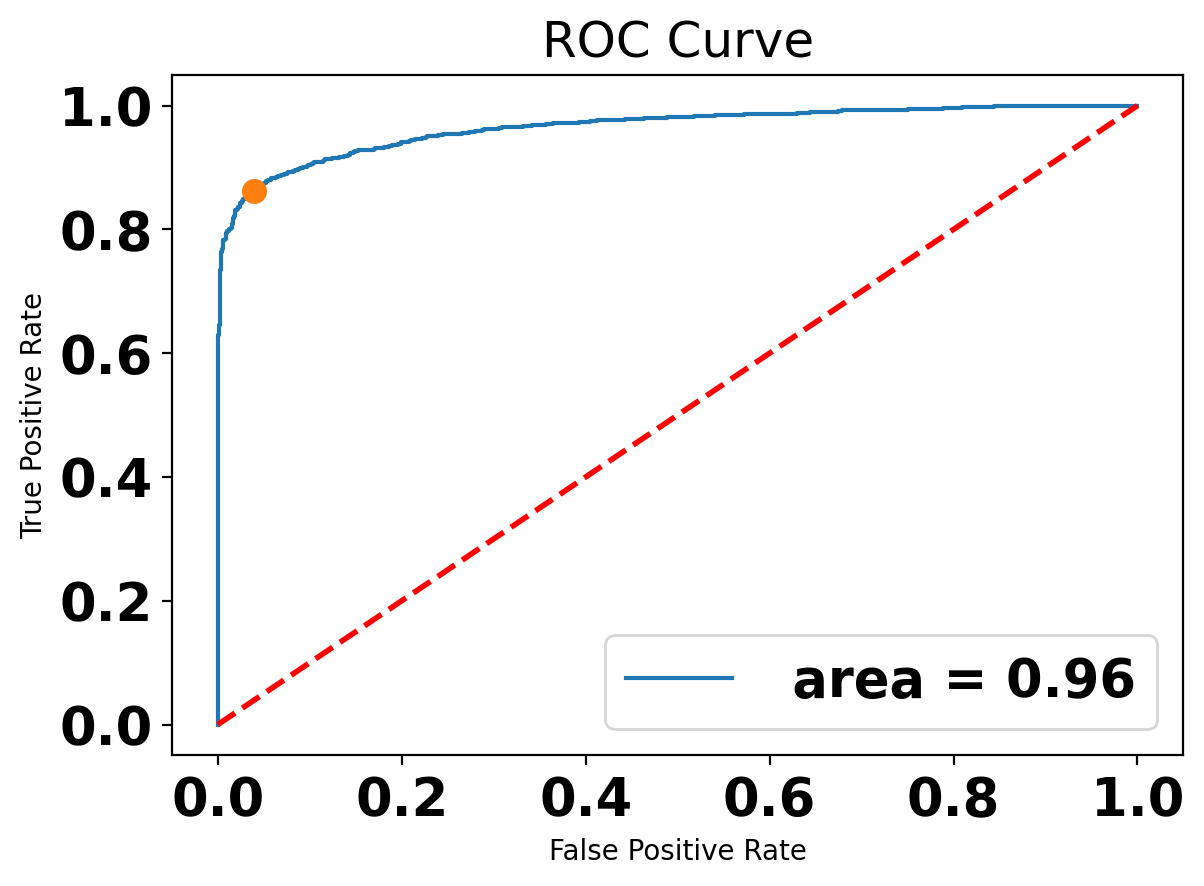

In [124]:
lbgm_tuned = model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
y_pred_prob = lbgm_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()